# 서울시 공원현황 데이터를 이용한 데이터분석

In [173]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
import seaborn as sns
import json
import folium

In [174]:
df =pd.read_csv('./과제data/서울시 주요 공원현황.csv', encoding='CP949')
df.head()

,공원번호,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
0,1,남산도시자연공원,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,기반시설 : 광장 45950㎡ 도로 108530㎡ 산책로 6.7㎞ (북측:3.7㎞/...,소나무 단풍 아카시아 상수리나무 등 191종 2881870주,http://parks.seoul.go.kr/upload/seditorMulti/2...,명동역(남산케이블카 와룡묘 서울애니메이션센터 방면) 도보 명동역 3번출구 → 퍼시픽...,남산공원 차량통행 금지안내 2005년 5월 1일부터 남산공원에 일반승용차 택시 통행...,http://parks.seoul.go.kr/file/info/view.do?fId...,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,02-3783-5900,198364.107,450395.554,126.990377,37.550140,http://parks.seoul.go.kr/template/sub/namsan.do
1,3,길동생태공원,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,80683㎡,1999.5.20,탐방객안내소 야외전시대 관찰대 목재데크 조류관찰대 길동생태문화센터,소나무 보리수 등 64종 31800주 산국 부들 등 138종 192800본,http://parks.seoul.go.kr/template/common/img/p...,NaN,매주 월요일은 휴관입니다 사전예약 후 입장하실 수 있습니다. ▶ 인터넷 예약 바로가...,http://parks.seoul.go.kr/file/info/view.do?fId...,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,02-489-2770,213554.120,448852.675,127.154779,37.540394,http://parks.seoul.go.kr/template/sub/gildong.do
2,4,서울대공원,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...,9132690m²,1984.5.1,동물원 식물원 테마가든(장미원 어린이동물원 피크닉장) 치유숲 산림욕장 캠핑장 국립현...,NaN,NaN,지하철 4호선 대공원역 하차(2번 출구) 도보 15분 정도 문의처 02)500-73...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,과천시,경기도 과천시 대공원광장로 102,전략기획실,02-500-7032,200994.267,437163.981,127.019847,37.426449,http://grandpark.seoul.go.kr/
3,5,서울숲,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...,480994㎡,2005.6.18,4개 테마공원: 문화예술공원 자연생태숲 자연체험학습원 습지생태원 주요시설: 가족마당...,수 목 : 소나무 섬잣나무 계수나무 외 95종 415795주 식물원 : 선인장 등 ...,http://parks.seoul.go.kr/template/common/img/p...,NaN,지하철 분당선 서울숲역 3번출구 도보로 약5분 2호선 뚝섬역 8번출구 도보로 약 1...,http://parks.seoul.go.kr/file/info/view.do?fId...,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,02-460-2905,203695.432,449290.726,127.041798,37.543072,http://parks.seoul.go.kr/template/sub/seoulfor...
4,6,월드컵공원,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...,2284085㎡,2002.5.1,평화의 공원 월드컵공원전시관(879㎡) 유니세프광장(2400㎡) 평화광장(5217㎡...,NaN,http://parks.seoul.go.kr/template/common/img/p...,지하철 6호선 월드컵경기장역 하차 → 1번 출구로 나온 후 직진 → 큰길(도로)이 ...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,02-300-5500,190658.070,451598.831,126.878907,37.571805,http://parks.seoul.go.kr/template/sub/worldcup...


In [175]:
df.columns

Index(['공원번호', '공원명', '공원개요', '면적', '개원일', '주요시설', '주요식물', '안내도', '오시는길',
       '이용시참고사항', '이미지', '지역', '공원주소', '관리부서', '전화번호', 'X좌표(GRS80TM)',
       'Y좌표(GRS80TM)', 'X좌표(WGS84)', 'Y좌표(WGS84)', '바로가기'],
      dtype='object')

In [176]:
# 'X좌표(WGS84)', 'Y좌표(WGS84)' 위도경도는 남겨둔다
del df['공원번호']
del df['공원개요']
del df['개원일']
del df['주요시설']
del df['안내도']
del df['오시는길']
del df['이용시참고사항']
del df['이미지']
del df['관리부서']
del df['전화번호']
del df['X좌표(GRS80TM)']
del df['Y좌표(GRS80TM)']
del df['바로가기']
del df['주요식물']

In [177]:
df

,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
0,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,중구,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140
1,길동생태공원,80683㎡,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394
2,서울대공원,9132690m²,과천시,경기도 과천시 대공원광장로 102,127.019847,37.426449
3,서울숲,480994㎡,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072
4,월드컵공원,2284085㎡,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805
...,...,...,...,...,...,...
127,용마도시자연공원(사가정공원),109635㎡,중랑구,서울특별시 중랑구 면목7동 산50,127.095997,37.579762
128,문화비축기지,140022㎡,마포구,서울특별시 마포구 증산로 87,126.893245,37.571718
129,경춘선숲길,211392㎡,NaN,노원구 공릉2동 산 82-2,127.076482,37.627077
130,율현공원,157535㎡,강남구,서울특별시 강남구 율현동 밤고개로24길(율현동 56),127.115594,37.472332


In [178]:
# 이름변경
df.rename({'지역' : '구별','공원주소' : 'addr' , 'X좌표(WGS84)' : 'lng',
'Y좌표(WGS84)' : 'lat'}, inplace=True, axis=1)

In [179]:
# 면적 없는값 필터링
df = df.dropna(subset=['면적'])
df

,공원명,면적,구별,addr,lng,lat
0,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,중구,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140
1,길동생태공원,80683㎡,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394
2,서울대공원,9132690m²,과천시,경기도 과천시 대공원광장로 102,127.019847,37.426449
3,서울숲,480994㎡,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072
4,월드컵공원,2284085㎡,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805
...,...,...,...,...,...,...
126,서일대뒷산공원,631021㎡,중랑구,서울특별시 중랑구 면목동 산19,127.098782,37.587716
127,용마도시자연공원(사가정공원),109635㎡,중랑구,서울특별시 중랑구 면목7동 산50,127.095997,37.579762
128,문화비축기지,140022㎡,마포구,서울특별시 마포구 증산로 87,126.893245,37.571718
129,경춘선숲길,211392㎡,NaN,노원구 공릉2동 산 82-2,127.076482,37.627077


In [180]:
# 면적이 없는 값 제거
df.drop([6], inplace=True)

In [181]:
# 세제곱은 그냥 제곱처리..;
tmp_l = []
for i in df.index:
    a = df['면적'].str.split('㎡')[i][0] 
    a = a.strip('㎥ ')
    a = a.strip('m²')
    a = a.strip('총 ')
    tmp_l.append(a.replace('m2',''))

In [182]:
tmp_l

['2896887',
 '80683',
 '9132690',
 '480994',
 '2284085',
 '8948.1',
 '6456',
 '80309',
 '1980.4',
 '5197.7',
 '11467',
 '229539',
 '15179.7',
 '16734.60',
 '61544',
 '424106',
 '560552',
 '26696.8',
 '75900',
 '113021.7',
 '201779',
 '258991',
 '10420819.08',
 '171294.1',
 '15000',
 '297926',
 '411972',
 '98470',
 '2038741.3',
 '603715.2',
 '108120',
 '29619.3',
 '29843.8',
 '126026',
 '135002.7',
 '384026',
 '180000',
 '416031',
 '160720',
 '2277252',
 '19599.70',
 '138596',
 '185295',
 '254648',
 '29816.5',
 '762642',
 '664905',
 '99599.9',
 '5802',
 '16500',
 '585652',
 '649709.6',
 '72132',
 '66027.8',
 '265582',
 '2088704.9',
 '112070',
 '993724',
 '219167',
 '1349556.4',
 '1511198',
 '1097565',
 '328018',
 '1447122',
 '207790',
 '1018689',
 '954553',
 '1667848',
 '13224',
 '130345',
 '5332422',
 '5107964',
 '47832',
 '213552',
 '168099.87',
 '359435.2',
 '36660',
 '380735',
 '1807420.9',
 '359342.8',
 '632733',
 '328018',
 '6691885.3',
 '285757',
 '110407',
 '29682.2',
 '137759',

In [183]:
df['면적'] = tmp_l

In [184]:
# 구의 값이 없는걸 찾기
df[df['구별'].isnull()]

,공원명,면적,구별,addr,lng,lat
129,경춘선숲길,211392,NaN,노원구 공릉2동 산 82-2,127.076482,37.627077


In [185]:
df['구별'][129] = '노원구'

In [186]:
# 타입바꿔주기
df = df.astype({'면적': 'float'})

In [187]:
# 구별 공원의 갯수
df['구별'].value_counts()

종로구     12
강서구      9
강동구      7
강남구      7
송파구      7
동작구      7
서초구      6
은평구      6
중랑구      6
도봉구      6
마포구      5
양천구      5
성동구      5
영등포구     5
금천구      4
강북구      4
동대문구     4
서대문구     4
성북구      3
중구       3
노원구      3
구로구      3
용산구      2
광진구      2
관악구      2
과천시      1
Name: 구별, dtype: int64

In [188]:
df.groupby('구별')['면적'].sum()

구별
강남구      3626398.50
강동구      1526389.30
강북구      3714902.40
강서구      2194154.10
과천시      9132690.00
관악구     10431453.08
광진구       584002.00
구로구      1617657.00
금천구        57568.00
노원구     12235699.30
도봉구      1084218.00
동대문구      458663.70
동작구      3706739.10
마포구      2685112.70
서대문구     3321476.60
서초구     13359636.00
성동구       626838.70
성북구      1198327.00
송파구      2838992.80
양천구      1203428.50
영등포구      424446.00
용산구       247194.10
은평구      2986459.00
종로구      3907680.57
중구       2943303.80
중랑구      7078975.00
Name: 면적, dtype: float64

In [189]:
df[df['구별'] == '과천시']

,공원명,면적,구별,addr,lng,lat
2,서울대공원,9132690.0,과천시,경기도 과천시 대공원광장로 102,127.019847,37.426449


In [190]:
# 과천시 제거
df.drop([2], inplace=True)

In [191]:
pd.pivot_table(df,index=['구별','공원명'])

lat         lng         면적
구별  공원명                                              
강남구 광평근린공원           37.488045  127.092184   519782.0
    대모산도시자연공원        37.479649  127.080964  2277252.0
    도곡근린공원           37.490313  127.045034   254648.0
    도산근린공원           37.524675  127.035030    29816.5
    봉은공원             37.513903  127.055496   328018.0
...                        ...         ...        ...
중랑구 봉화산근린공원          37.610640  127.092362  1018689.0
    서일대뒷산공원          37.587716  127.098782   631021.0
    용마도시자연공원(사가정공원)  37.579762  127.095997   109635.0
    용마폭포공원           37.573197  127.090589  5107964.0
    중랑캠핑숲            37.604990  127.109307   179666.0

[127 rows x 3 columns]

### 인구와 공원의 상관관계

In [192]:
df2 =pd.read_csv('./results/서울시인구수와CCTV.csv')
df2.head()

,구별,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,오차
0,강남구,1790,138.544892,544085,539235,4850,73942,0.891405,13.590156,728.907284
1,강동구,852,252.818991,462275,458058,4217,68798,0.912228,14.882483,127.928344
2,강북구,574,159.444444,313550,309996,3554,62951,1.133472,20.076862,258.377053
3,강서구,708,132.336449,589536,583544,5992,88052,1.016393,14.935814,398.185026
4,관악구,1984,130.957096,514555,498574,15981,78206,3.105790,15.198764,952.204239


In [193]:
peo = df2[['구별','인구수']]
peo.set_index('구별', inplace=True)
peo.head()

,인구수
구별,
강남구,544085
강동구,462275
강북구,313550
강서구,589536
관악구,514555


In [194]:
peo['공원의수'] = df['구별'].value_counts()
peo['공원의면적'] = df.groupby('구별')['면적'].sum()

In [195]:
peo.head()

,인구수,공원의수,공원의면적
구별,,,
강남구,544085,7,3626398.50
강동구,462275,7,1526389.30
강북구,313550,4,3714902.40
강서구,589536,9,2194154.10
관악구,514555,2,10431453.08


In [196]:
fp1 =np.polyfit(peo['인구수'], peo['공원의수'], 1)
fp1

array([2.03842835e-06, 4.26846017e+00])

In [197]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)
fy = f1(fx)

In [198]:
peo['오차'] = np.abs(peo['공원의수'] - f1(peo['인구수']))
peo_sort = peo.sort_values('오차', ascending=False)
peo_sort.head()

,인구수,공원의수,공원의면적,오차
구별,,,,
종로구,159842,12,3907680.57,7.405713
강서구,589536,9,2194154.10,3.529813
관악구,514555,2,10431453.08,3.317344
광진구,361923,2,584002.00,3.006214
용산구,244953,2,247194.10,2.767779


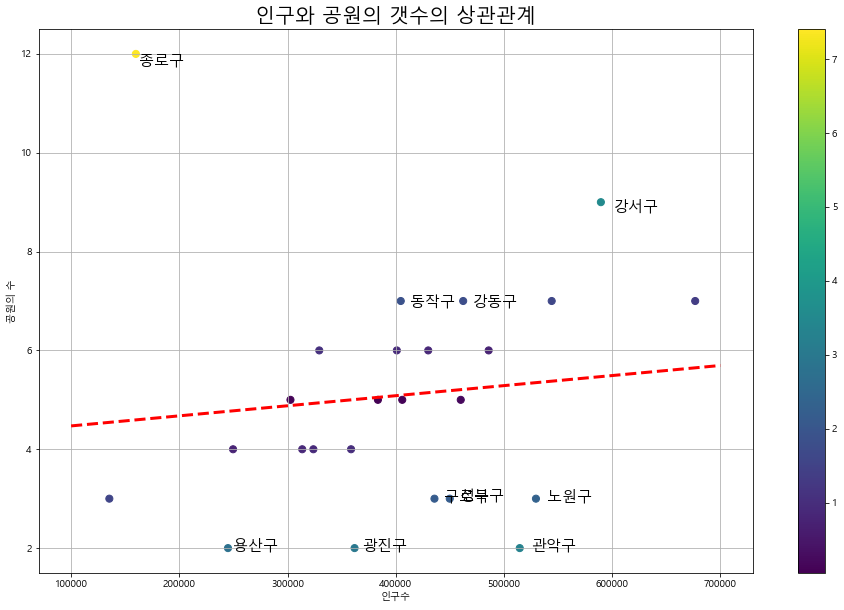

In [199]:
plt.figure(figsize=(16,10))
plt.scatter(peo['인구수'], peo['공원의수'], c=peo['오차'], s=50)
for i in range(10): 
    plt.text(peo_sort['인구수'][i]*1.02, peo_sort['공원의수'][i]*0.98,
             peo_sort.index[i], fontsize=15)
plt.plot(fx,fy,ls='dashed', lw=3, color='r')
plt.grid(True)
plt.title('인구와 공원의 갯수의 상관관계', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('공원의 수')
plt.colorbar()    
plt.show()

#### 전체적으로 정비례하며, 인구에 비해 종로구가 공원의 수가 압도적으로 많다.

### 시의 면적과 공원의 면적의 상관관계

In [200]:
s_size =pd.read_table('./과제data/서울시 면적.txt', header=1)
s_size.head()

,기간,자치구,면적,구성비(%),행정,법정,통,반
0,2019,서울시,605.24,100.0,424,467,"12,713","94,152"
1,2019,종로구,23.91,4.0,17,87,278,"1,479"
2,2019,중구,9.96,1.6,15,74,253,"1,580"
3,2019,용산구,21.87,3.6,16,36,351,"2,550"
4,2019,성동구,16.86,2.8,17,17,466,"3,619"


In [201]:
need_size = pd.DataFrame(s_size[['자치구','면적']])
need_size.head()

,자치구,면적
0,서울시,605.24
1,종로구,23.91
2,중구,9.96
3,용산구,21.87
4,성동구,16.86


In [202]:
# 전체는 필요없으니 삭제
need_size.drop([0], inplace=True)

In [203]:
need_size.rename({'자치구':'구별'}, inplace=True, axis=1)
need_size.set_index('구별', inplace=True)
need_size.head()

,면적
구별,
종로구,23.91
중구,9.96
용산구,21.87
성동구,16.86
광진구,17.06


In [204]:
peo['구의면적'] = need_size['면적']
peo.head()

,인구수,공원의수,공원의면적,오차,구의면적
구별,,,,,
강남구,544085,7,3626398.50,1.622462,39.50
강동구,462275,7,1526389.30,1.789225,24.59
강북구,313550,4,3714902.40,0.907609,23.60
강서구,589536,9,2194154.10,3.529813,41.44
관악구,514555,2,10431453.08,3.317344,29.57


In [205]:
fp1 =np.polyfit(peo['구의면적'], peo['공원의면적'], 1)
fp1

array([  223419.04664711, -2046497.14170783])

In [206]:
f1 = np.poly1d(fp1)
fx = np.linspace(10, 50, 100)
fy = f1(fx)

In [207]:
peo['오차'] = np.abs(peo['공원의면적'] - f1(peo['구의면적']))
peo_sort = peo.sort_values('오차', ascending=False)
peo_sort.head()

,인구수,공원의수,공원의면적,오차,구의면적
구별,,,,,
노원구,529532,3,12235699.30,6.364225e+06,35.44
관악구,514555,2,10431453.08,5.871449e+06,29.57
강서구,589536,9,2194154.10,5.017834e+06,41.44
중랑구,400989,6,7078975.00,4.992220e+06,18.50
서초구,429995,6,13359636.00,4.909906e+06,46.98


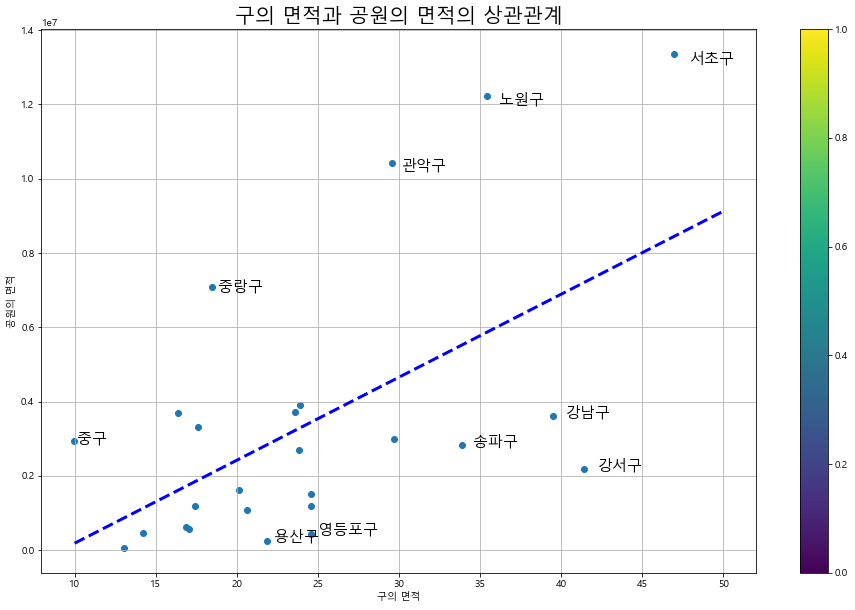

In [208]:
plt.figure(figsize=(16,10))
plt.scatter(peo['구의면적'], peo['공원의면적'])
plt.grid(True)
plt.plot(fx,fy, ls='dashed', lw=3, color ='b')
for i in range(10): 
    plt.text(peo_sort['구의면적'][i]*1.02, peo_sort['공원의면적'][i]*0.98,
             peo_sort.index[i], fontsize=15)
plt.title('구의 면적과 공원의 면적의 상관관계', fontsize=20)
plt.xlabel('구의 면적')
plt.ylabel('공원의 면적')
plt.colorbar()    
plt.show()

#### 이 그래프도 전체적으로는 정비례하며, 강서구는 시의 면적의 비해 공원의 면적이 매우 적은 것을 확인 할 수 있다.

In [209]:
df = df.reset_index()

In [210]:
del df['index']

In [211]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')
for i in df.index:
    folium.CircleMarker([df.lat[i], df.lng[i]], 
                        tooltip=df['공원명'][i], radius= df['면적'][i]*0.000002,color='#3186cc', fill_color='#3186cc').add_to(map)


title_html = '''
             <h3 align="center" style="font-size:20px"><b>서울의 모든 공원 크기별로 표시하기</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))                      
map

In [212]:
map = folium.Map(location=[df[df['구별']=='강서구']['lat'].mean(),
df[df['구별']=='강서구']['lng'].mean()], zoom_start=13)
for i in df[df['구별']=='강서구'].index:
    folium.Marker([df.lat[i], df.lng[i]], popup=df['공원명'][i],
                        tooltip=df['면적'][i]).add_to(map)
                        
title_html = '''
             <h3 align="center" style="font-size:20px"><b>강서구의 공원들</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))
map

### 서울시민의 행복지수와 공원 면적의 상관관계

In [213]:
# 서울시 행복지수 가져오기
happy =pd.read_table('./과제data/서울시 행복지수.txt', header=28)
need_happy=happy[['지역대분류','6.81']]

In [214]:
need_happy.head()

,지역대분류,6.81
0,종로구,7.18
1,중구,6.48
2,용산구,6.28
3,성동구,6.71
4,광진구,6.94


In [215]:
need_happy.rename({'지역대분류' : '구별', '6.81': '행복지수'},inplace=True,axis=1)
need_happy.set_index('구별',inplace=True)
need_happy.head()

,행복지수
구별,
종로구,7.18
중구,6.48
용산구,6.28
성동구,6.71
광진구,6.94


In [216]:
peo['행복지수'] = need_happy['행복지수']
del peo['오차']

In [217]:
peo.head()

,인구수,공원의수,공원의면적,구의면적,행복지수
구별,,,,,
강남구,544085,7,3626398.50,39.50,7.01
강동구,462275,7,1526389.30,24.59,6.40
강북구,313550,4,3714902.40,23.60,7.11
강서구,589536,9,2194154.10,41.44,6.72
관악구,514555,2,10431453.08,29.57,7.14


In [218]:
fp1 =np.polyfit(peo['행복지수'], peo['공원의면적'], 1)
fp1

array([  3865311.36939094, -22989758.18195965])

In [219]:
f1 = np.poly1d(fp1)
fx = np.linspace(6.25, 7.3, 100)
fy = f1(fx)

In [220]:
peo['오차'] = np.abs(peo['공원의면적'] - f1(peo['행복지수']))
peo_sort = peo.sort_values('오차', ascending=False)
peo_sort.head()

,인구수,공원의수,공원의면적,구의면적,행복지수,오차
구별,,,,,,
서초구,429995,6,13359636.00,46.98,6.78,1.014258e+07
노원구,529532,3,12235699.30,35.44,7.22,7.317909e+06
관악구,514555,2,10431453.08,29.57,7.14,5.822888e+06
중랑구,400989,6,7078975.00,18.50,6.44,5.176128e+06
금천구,249641,4,57568.00,13.02,7.02,4.087160e+06


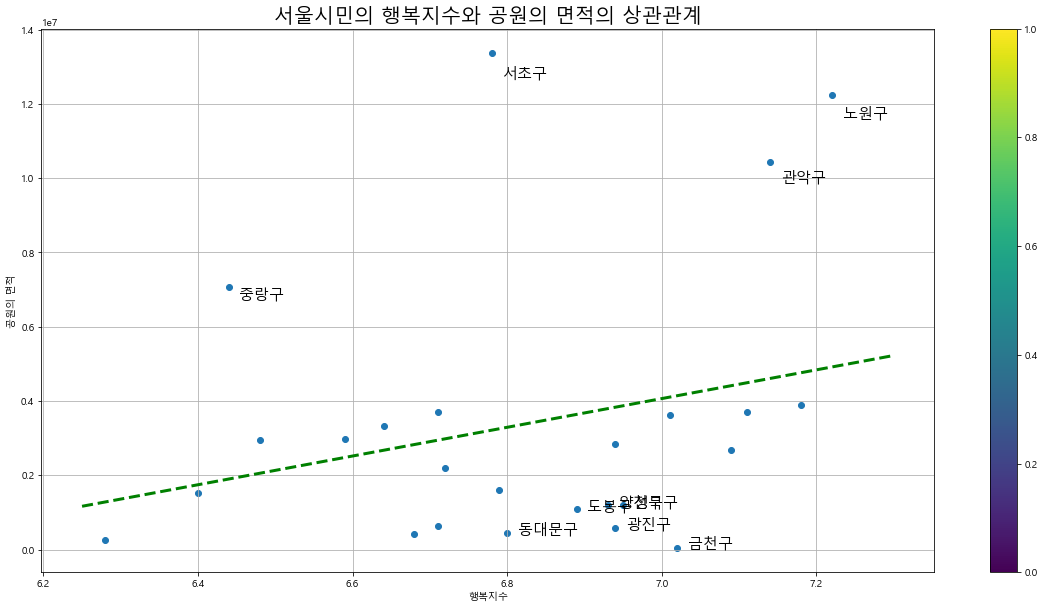

In [221]:
plt.figure(figsize=(20,10))
plt.scatter(peo['행복지수'], peo['공원의면적'])
plt.grid(True)
plt.plot(fx,fy, ls='dashed', lw=3, color ='g')
for i in range(10): 
    plt.text(peo_sort['행복지수'][i]*1.002, peo_sort['공원의면적'][i]*0.95,
             peo_sort.index[i], fontsize=15)
plt.title('서울시민의 행복지수와 공원의 면적의 상관관계', fontsize=20)
plt.xlabel('행복지수')
plt.ylabel('공원의 면적')
plt.colorbar()    
plt.show()

### 자살율 데이터 가져오기

In [222]:
suicide = pd.read_table('./과제data/서울시 자살지수.txt', header=1)
suicide.head()

,기간,자치구,계,남자,여자,계.1,남자.1,여자.1
0,2019,합계,"2,151","1,438",713,22.5,30.8,14.5
1,2019,종로구,39,30,9,26.6,41.9,12.0
2,2019,중구,25,20,5,20.5,33.4,8.1
3,2019,용산구,40,27,13,18.3,25.4,11.5
4,2019,성동구,57,41,16,19.1,28.0,10.5


In [223]:
need_suicide = suicide[['자치구', '계.1']]
need_suicide.head()

,자치구,계.1
0,합계,22.5
1,종로구,26.6
2,중구,20.5
3,용산구,18.3
4,성동구,19.1


In [224]:
# 이름 바꿔주기 * 자살률 : (자살 사망자수 ÷ 연앙인구) × 100,000
need_suicide.rename({'자치구' :  '구별', '계.1' : '자살율'}, inplace=True, axis=1)
need_suicide.set_index('구별',inplace=True)

In [225]:
del peo['오차']

In [226]:
peo['자살율'] = need_suicide['자살율']

In [227]:
peo.head()

,인구수,공원의수,공원의면적,구의면적,행복지수,자살율
구별,,,,,,
강남구,544085,7,3626398.50,39.50,7.01,25.0
강동구,462275,7,1526389.30,24.59,6.40,26.1
강북구,313550,4,3714902.40,23.60,7.11,23.2
강서구,589536,9,2194154.10,41.44,6.72,24.2
관악구,514555,2,10431453.08,29.57,7.14,24.7


In [228]:
df_ana = peo[['인구수', '공원의수', '공원의면적', '구의면적', '행복지수', '자살율']]
df_corr = df_ana.corr()
df_corr

,인구수,공원의수,공원의면적,구의면적,행복지수,자살율
인구수,1.000000,0.110607,0.275630,0.665510,0.175614,-0.117796
공원의수,0.110607,1.000000,-0.000091,0.334203,0.055462,0.135570
공원의면적,0.275630,-0.000091,1.000000,0.570268,0.269960,-0.067155
구의면적,0.665510,0.334203,0.570268,1.000000,0.231808,-0.155082
행복지수,0.175614,0.055462,0.269960,0.231808,1.000000,0.155022
자살율,-0.117796,0.135570,-0.067155,-0.155082,0.155022,1.000000


### 자살율과 나머지 데이터는 상관관계가 적은 것을 확인 할 수 있다. 

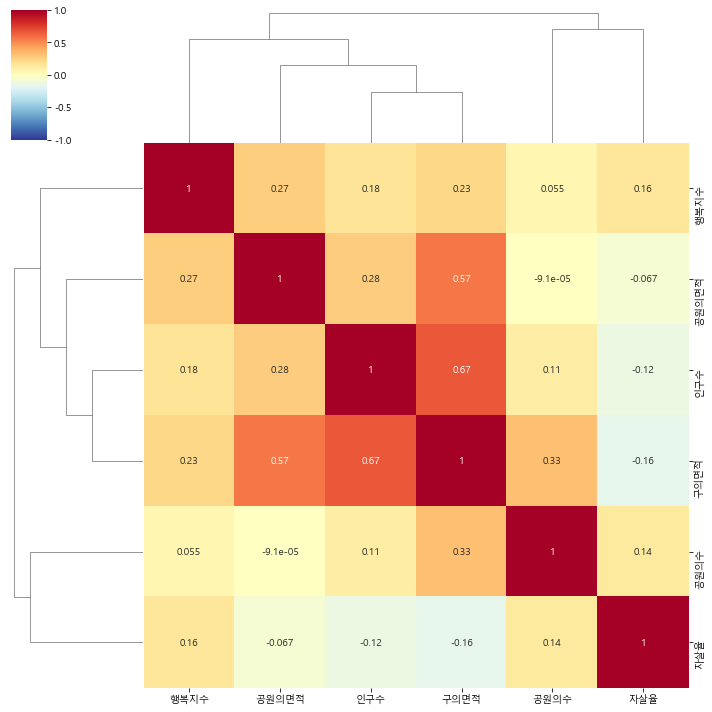

In [229]:
sns.clustermap(df_corr, 
               annot = True,        # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',   # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
)
plt.show()

### 미세먼지 데이터 

In [230]:
dust = pd.read_table('./과제data/서울시 미세먼지.txt', header=3)
dust.head()

,2018,평 균,0.004,0.5,0.028,40,23,0.023
0,2018,종로구,0.005,0.6,0.032,35,21,0.025
1,2018,중구,0.003,0.5,0.031,36,22,0.025
2,2018,용산구,0.003,0.4,0.030,34,23,0.022
3,2018,성동구,0.005,0.4,0.026,42,24,0.018
4,2018,광진구,0.005,0.6,0.027,40,21,0.021


In [248]:
# 필요한 정보만 뺴오기  
need_dust = pd.DataFrame() # 빈 데이터 프레임 만들기
need_dust[['구별','초미세먼지']] = dust[['평 균','23']]

In [249]:
need_dust.set_index('구별',inplace=True)
need_dust.head()

,초미세먼지
구별,
종로구,21
중구,22
용산구,23
성동구,24
광진구,21


In [239]:
peo['공원의비율'] = peo['공원의면적'] / peo['구의면적']*1000

In [251]:
peo['초미세먼지'] = need_dust['초미세먼지']
peo.head()

,인구수,공원의수,공원의면적,구의면적,행복지수,자살율,공원의비율,미세먼지,초미세먼지
구별,,,,,,,,,
강남구,544085,7,3626398.50,39.50,7.01,25.0,9.180756e+07,35,22
강동구,462275,7,1526389.30,24.59,6.40,26.1,6.207358e+07,44,23
강북구,313550,4,3714902.40,23.60,7.11,23.2,1.574111e+08,35,19
강서구,589536,9,2194154.10,41.44,6.72,24.2,5.294773e+07,39,22
관악구,514555,2,10431453.08,29.57,7.14,24.7,3.527715e+08,43,27


In [257]:
df_ana = peo[['공원의비율','초미세먼지']]
df_corr = df_ana.corr()
df_corr

,공원의비율,초미세먼지
공원의비율,1.000000,-0.128434
초미세먼지,-0.128434,1.000000


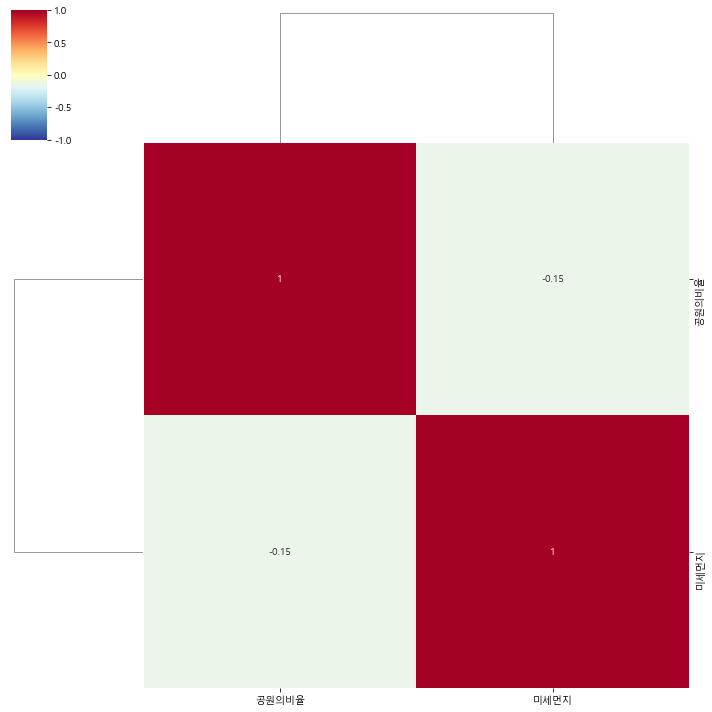

In [244]:
sns.clustermap(df_corr, 
               annot = True,        # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',   # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
)
plt.show()

#### 상관관계가 낮으니 다른 데이터로 비교해보자

In [279]:
park = pd.read_table('./과제data/서울시 공원율.txt', header=2)
park.head()

,2019,합계,"605,237,002","168,896,780",27.91,"148,403,999","20,492,781"
0,2019,종로구,"23,913,280","11,556,112",48.33,"11,489,786","66,327"
1,2019,중구,"9,959,983","3,155,139",31.68,"3,124,646","30,494"
2,2019,용산구,"21,866,384","1,779,562",8.14,"1,664,655","114,907"
3,2019,성동구,"16,859,343","3,100,047",18.39,"2,994,794","105,253"
4,2019,광진구,"17,062,949","3,363,481",19.71,"3,360,846","2,635"


In [282]:
# 필요한거만 뺴오기
need_park = pd.DataFrame()
need_park[['구별','공원율']] = park[['합계', '27.91']]
need_park.set_index('구별',inplace=True)
need_park.head()

,공원율
구별,
종로구,48.33
중구,31.68
용산구,8.14
성동구,18.39
광진구,19.71


In [289]:
peo['공원율'] = need_park['공원율']
peo.head()

,인구수,공원의수,공원의면적,구의면적,행복지수,자살율,공원의비율,미세먼지,초미세먼지,오차,공원율
구별,,,,,,,,,,,
강남구,544085,7,3626398.50,39.50,7.01,25.0,9.180756e+07,35,22,4.677933e+07,16.69
강동구,462275,7,1526389.30,24.59,6.40,26.1,6.207358e+07,44,23,6.881941e+07,13.7
강북구,313550,4,3714902.40,23.60,7.11,23.2,1.574111e+08,35,19,4.257433e+06,60.77
강서구,589536,9,2194154.10,41.44,6.72,24.2,5.294773e+07,39,22,8.563915e+07,10.55
관악구,514555,2,10431453.08,29.57,7.14,24.7,3.527715e+08,43,27,2.526541e+08,37.12


In [296]:
# 타입바꿔주기
peo = peo.astype({'공원율': 'float'})

In [297]:
df_ana = peo[['초미세먼지','공원율']]
df_corr = df_ana.corr()
df_corr

,초미세먼지,공원율
초미세먼지,1.000000,-0.228893
공원율,-0.228893,1.000000


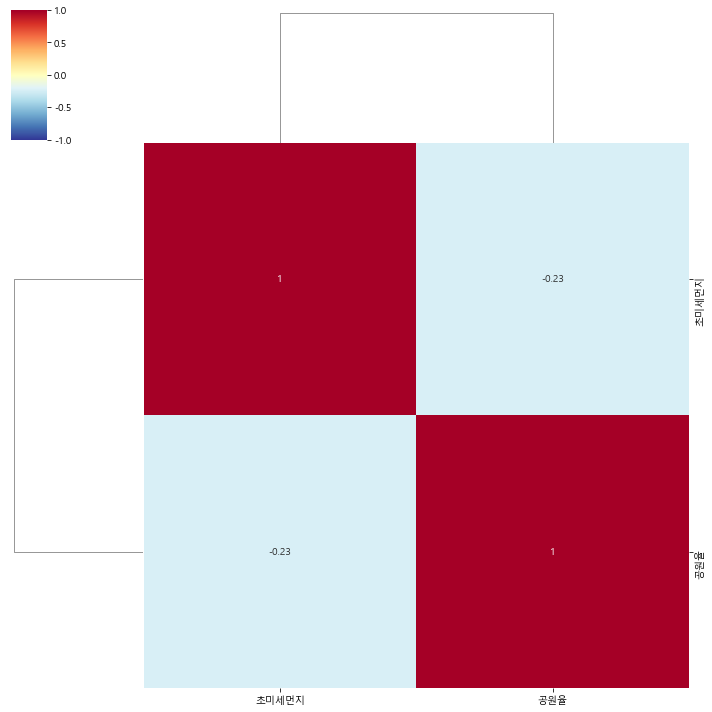

In [298]:
sns.clustermap(df_corr, 
               annot = True,        # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',   # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
)
plt.show()

### 위의 데이터보다는 상관관계가 높으니 이데이터로 진행

In [299]:
fp1 =np.polyfit(peo['초미세먼지'], peo['공원율'], 1)
fp1

array([-1.69077962, 65.10706882])

In [303]:
f1 = np.poly1d(fp1)
fx = np.linspace(19, 28, 100)
fy = f1(fx)

In [309]:
peo['오차'] = np.abs(peo['공원율'] - f1(peo['초미세먼지']))
peo_sort = peo.sort_values('오차', ascending=False)
peo_sort.head()

,인구수,공원의수,공원의면적,구의면적,행복지수,자살율,공원의비율,미세먼지,초미세먼지,오차,공원율
구별,,,,,,,,,,,
강북구,313550,4,3714902.40,23.60,7.11,23.2,1.574111e+08,35,19,27.787744,60.77
은평구,485842,6,2986459.00,29.71,6.59,19.9,1.005203e+08,40,26,25.943201,47.09
도봉구,329300,6,1084218.00,20.66,6.89,24.1,5.247909e+07,41,23,22.540862,48.76
종로구,159842,12,3907680.57,23.91,7.18,26.6,1.634329e+08,35,21,18.729303,48.33
용산구,244953,2,247194.10,21.87,6.28,18.3,1.130289e+07,34,23,18.079138,8.14


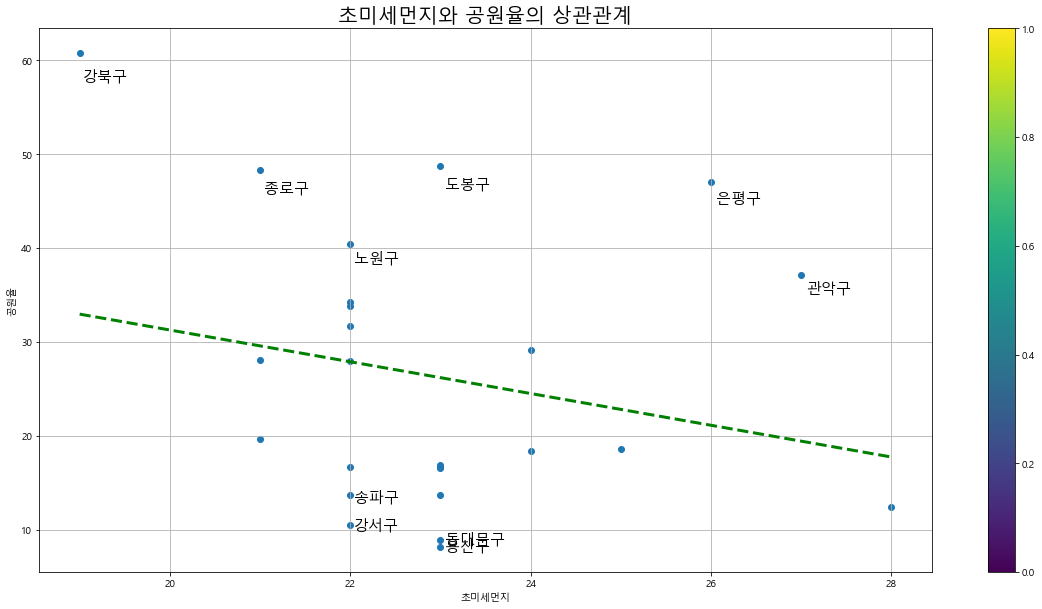

In [310]:
plt.figure(figsize=(20,10))
plt.scatter(peo['초미세먼지'], peo['공원율'])
plt.grid(True)
plt.plot(fx,fy, ls='dashed', lw=3, color ='g')
for i in range(10): 
    plt.text(peo_sort['초미세먼지'][i]*1.002, peo_sort['공원율'][i]*0.95,
             peo_sort.index[i], fontsize=15)
plt.title('초미세먼지와 공원율의 상관관계', fontsize=20)
plt.xlabel('초미세먼지')
plt.ylabel('공원율')
plt.colorbar()    
plt.show()

### 강북구는 압도적인 공원율로 낮은 초미세먼지 수치를 갖고 있고 , 관악구는 높은 공원율에 비해 높은 초미세먼지 수치를 갖고 있는 것을 볼 수 있다.